In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/traffic.csv')



In [ ]:
df.head()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
0,9/24/2017,Saturday,6,32,21,38,1
1,2/12/2017,Saturday,6,103,36,16,1
2,8/14/2017,Sunday,7,79,21,15,1
3,5/15/2017,Sunday,7,65,13,40,1
4,4/16/2017,Saturday,6,93,36,20,1


In [ ]:
df.tail()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
4995,5/20/2017,Friday,5,130,45,45,5
4996,2/20/2017,Sunday,7,90,4,8,5
4997,8/30/2017,Tuesday,2,32,21,11,5
4998,3/5/2017,Saturday,6,74,33,12,5
4999,8/21/2017,Sunday,7,36,34,33,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5000 non-null   object
 1   Day          5000 non-null   object
 2   CodedDay     5000 non-null   int64 
 3   Zone         5000 non-null   int64 
 4   Weather      5000 non-null   int64 
 5   Temperature  5000 non-null   int64 
 6   Traffic      5000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,CodedDay,Zone,Weather,Temperature,Traffic
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.008600,71.948600,23.413000,25.517400,3.000000
std,1.998631,33.517665,13.718559,11.644776,1.414355
min,1.000000,15.000000,0.000000,6.000000,1.000000
25%,2.000000,42.000000,11.750000,15.000000,2.000000
50%,4.000000,72.000000,23.000000,26.000000,3.000000
75%,6.000000,101.000000,35.000000,36.000000,4.000000
max,7.000000,130.000000,47.000000,45.000000,5.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Date']=le.fit_transform(df['Date'])
df['Day']=le.fit_transform(df['Day'])
df

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
0,350,2,6,32,21,38,1
1,125,2,6,103,36,16,1
2,308,3,7,79,21,15,1
3,217,3,7,65,13,40,1
4,188,2,6,93,36,20,1
...,...,...,...,...,...,...,...
4995,223,0,5,130,45,45,5
4996,134,3,7,90,4,8,5
4997,326,5,2,32,21,11,5
4998,176,2,6,74,33,12,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         5000 non-null   int64
 1   Day          5000 non-null   int64
 2   CodedDay     5000 non-null   int64
 3   Zone         5000 non-null   int64
 4   Weather      5000 non-null   int64
 5   Temperature  5000 non-null   int64
 6   Traffic      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [ ]:
X=df.drop('Traffic',axis=1)
y=df['Traffic']

In [ ]:
X

,Date,Day,CodedDay,Zone,Weather,Temperature
0,350,2,6,32,21,38
1,125,2,6,103,36,16
2,308,3,7,79,21,15
3,217,3,7,65,13,40
4,188,2,6,93,36,20
...,...,...,...,...,...,...
4995,223,0,5,130,45,45
4996,134,3,7,90,4,8
4997,326,5,2,32,21,11
4998,176,2,6,74,33,12


In [ ]:
X.shape

(5000, 6)

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4995    5
4996    5
4997    5
4998    5
4999    5
Name: Traffic, Length: 5000, dtype: int64

In [ ]:
y.shape

(5000,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape, y_train.shape

((3500, 6), (3500,))

In [ ]:
X_test.shape, y_test.shape

((1500, 6), (1500,))

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.64558497,  0.50985356, -0.02486711, -1.31423046,  1.42533851,
        -0.49196712],
       [ 1.19427827,  1.50510591, -0.52795897,  1.28410851, -0.75151046,
         1.39936387],
       [ 1.28888056, -1.48065114,  0.47822475, -0.47798344, -1.25944188,
        -0.6639063 ],
       ...,
       [-1.7005519 , -0.48539879,  0.9813166 , -1.25449853, -0.75151046,
         0.71160714],
       [-0.93427332, -0.48539879,  0.9813166 , -1.16490064, -0.67894883,
        -0.92181507],
       [-0.43288117, -1.48065114,  0.47822475,  0.92571692,  1.20765361,
        -0.74987589]])

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)
if(y_pred.all()<2.5):
  y_pred=np.round(y_pred-0.5)
else :
    y_pred=np.round(y_pred+0.5)
    y_pred

In [ ]:
er=(y_pred-y_test)/y_test
er=round(er.mean()*100,2)
print("Error=",er,"%")


Error= 19.18 %


In [ ]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)
if(y_pred.all()<2.5):
  y_pred=np.round(y_pred-0.5)
else:
  y_pred=np.round(y_pred+0.5)
y_pred

array([3., 3., 3., ..., 3., 2., 2.])

In [ ]:
er=(y_pred-y_test)/y_test
er=round(er.mean()*100,2)
print("Error=",er,"%")

Error= 19.18 %


In [ ]:
a=100-er
print("Accuracy=",a,"%")

Accuracy= 80.82 %


In [ ]:
#SVM
from sklearn.svm import SVR
import time
t1=time.time()
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)
t2=time.time()
print(("timecheck=",t2-t1))
y_pred=regressor.predict(X_test)
y_pred

('timecheck=', 0.5982112884521484)


array([3.02338992, 2.92803066, 3.00691086, ..., 3.07348157, 2.96871735,
       3.10613617])

In [ ]:
t3=time.time()
y_pred=regressor.predict(X_test)
t4=time.time()
print(("timecheck=",t4-t3))
if(y_pred.all()<2.5):
  y_pred=np.round(y_pred-0.5)
else:
  y_pred=np.round(y_pred+0.5)
y_pred

('timecheck=', 0.21288013458251953)


array([3., 2., 3., ..., 3., 2., 3.])

In [ ]:
er=(y_pred-y_test)/y_test
er=round(er.mean()*100,2)
print("Error=",er,"%")

Error= 16.41 %


In [ ]:
a=100-er
print("Accuracy=",a,"%")

Accuracy= 83.59 %


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier()
classifier1.fit(X_train,y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
y_pred=classifier1.predict(X_test)

In [ ]:
import time
t1=time.time()
classifier1=KNeighborsClassifier()
classifier1.fit(X_train,y_train)
t2=time.time()
print(("time check=",t2-t1))
KNeighborsClassifier()


('time check=', 0.004356861114501953)


KNeighborsClassifier()

In [ ]:
t3=time.time()
y_pred=classifier1.predict(X_test)
t4=time.time()
print(("time check",t4-t3))



('time check', 0.06589245796203613)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.178


In [ ]:
y_pred=regressor.predict(X_test)
if(y_pred.all()<2.5):
  y_pred=np.round(y_pred-0.5)
else :
    y_pred=np.round(y_pred+0.5)
    y_pred

In [ ]:
er=(y_pred-y_test)/y_test
er=round(er.mean()*100,2)
print("Error=",er,"%")

Error= 16.41 %


In [ ]:
a=100-er
print("Accuracy=",a,"%")

Accuracy= 83.59 %


IMPLEMENTATION OF LIME

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/traffic.csv')

In [ ]:
X = df.drop('traffic' ,axis=1)
y = df['traffic']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

KeyError: ignored

In [ ]:
classifier1=KNeighborsClassifier()
classifier1.fit(X_train,y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
y_pred=classifier1.predict(X_test)

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

ValueError: ignored

In [ ]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[1, 0],
    mode='regression'
)

TypeError: ignored

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

NameError: ignored

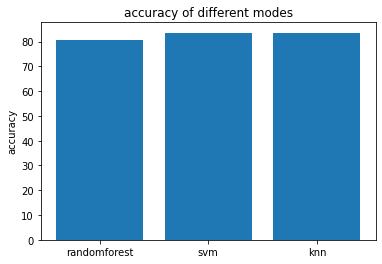

In [ ]:
import matplotlib.pyplot as plt
x=["randomforest","svm","knn"]
h=[80.82,83.59,83.59]
plt.bar(x,h)
plt.ylabel("accuracy")
plt.title("accuracy of different modes")
plt.show()